# Road Safety Data for the UK

#### The Data
The [files](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) provide detailed road safety data about the circumstances of personal injury road accidents in GB, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police. 

#### The Task
The purpose of the analysis is 
- To summarize the main characteristics of the data, and obtain interesting facts that are worth highlighting.
- Identity and quantify associations (if any) between the number of causalities (in the Accidents table) and other variables in the data set.
- Explore whether it is possible to predict accident hotspots based on the data.

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Preprocessing the Data'>2. Preprocessing the Data</a>

* <a href='#2.1. Converting Datetime Column'>2.1. Converting Datetime Column</a>
* <a href='#2.2. Handling Missing Values'>2.2. Handling Missing Values</a>

### <a href='#3. Exploratory Data Analysis (EDA)'>3. Exploratory Data Analysis (EDA)</a>

* <a href='#3.1. Main Characteristics of Accidents'>3.1. Main Characteristics of Accidents</a>
* <a href='#3.2. Main Characteristics of Casualties'>3.2. Main Characteristics of Casualties</a>
* <a href='#3.3. Main Characteristics of Vehicles'>3.3. Main Characteristics of Vehicles</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

**Accidents**

We had our `Date` column with values not properly stored in the correct format. Let's do this when importing data:

In [3]:
accidents = pd.read_csv('dft-road-casualty-statistics-accident-20199.csv',parse_dates=['Date'])
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 117536 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,9,9,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000546


In [4]:
accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [5]:
#accidents.info()

In [6]:
#accidents.isnull().sum()

The accidents table contains almost 120,000 records and 32 columns, with only very few missing values. If we decided to work with date and/or time, we will need to convert the string values into datetime format. Besides that, almost all data is properly stored as numeric data.

**Casualties**

In [7]:
casualties = pd.read_csv('dft-road-casualty-statistics-casualty-2019.csv')
print('Records:', casualties.shape[0], '\nColumns:', casualties.shape[1])
casualties.head()

Records: 153158 
Columns: 18


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2019010128300,2019,10128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,2019,10128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,2019,10128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,2019,10152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2019,10155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [8]:
#casualties.info()

In [9]:
#casualties.isnull().sum()

The casualties table has roughly 150,000 with 18 columns providing detailed information about the casualties. Apart from the index, all data is stored in a numeric format.

**Vehicles**

In [10]:
vehicles = pd.read_csv('dft-road-casualty-statistics-vehicle-2019.csv')
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 216381 
Columns: 27


,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2019010128300,2019,10128300,1,9,0,99,9,9,99,...,6,1,58,9,-1,-1,-1,-1,2,1
1,2019010128300,2019,10128300,2,9,0,99,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,2,1
2,2019010152270,2019,10152270,1,9,0,18,9,9,99,...,6,2,24,5,-1,-1,-1,-1,3,1
3,2019010152270,2019,10152270,2,9,0,18,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,6,1
4,2019010155191,2019,10155191,1,9,0,3,5,1,0,...,6,1,45,7,-1,-1,-1,-1,4,1


In [11]:
#vehicles.info()

In [12]:
#vehicles.isnull().sum()

The vehicles table is the largest of all three and contains roughly 216,000 records spanned over 27 columns with detailed information about the vehicle and its driver.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 2. Preprocessing the Data
<a id='2. Preprocessing the Data'></a>

#### 2.1. Converting Datetime Column
<a id='2.1. Converting Datetime Column'></a>

In [13]:
# check
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Police_Force                117536 non-null  int64         
 1   Accident_Severity           117536 non-null  int64         
 2   Number_of_Vehicles          117536 non-null  int64         
 3   Number_of_Casualties        117536 non-null  int64         
 4   Date                        117536 non-null  datetime64[ns]
 5   Day_of_Week                 117536 non-null  int64         
 6   Time                        117536 non-null  object        
 7   Local_Authority_(District)  117536 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 7.2+ MB


In [14]:
accidents.iloc[:, 5:13].head(2)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District)
0,1,3,2,3,2019-02-18,2,17:50,1
1,1,3,2,1,2019-01-15,3,21:45,9


Next, let's define a new column that groups the `Time` the accidents happened into one of five options:
- Morning
- Afternoon
- Rush_Hour
- Evening
- Night

In [15]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [16]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [17]:
# apply this function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head(8)

,Time,Hour,Daytime
0,17:50,17,afternoon rush (15-19)
1,21:45,21,evening (19-23)
2,01:50,1,night (23-5)
3,01:20,1,night (23-5)
4,00:40,0,night (23-5)
5,02:45,2,night (23-5)
6,01:35,1,night (23-5)
7,02:10,2,night (23-5)


#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [18]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.001 %


In [19]:
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

In [20]:
print('Proportion of Missing Values in Casualties Table:', 
      round(casualties.isna().sum().sum()/len(casualties),3), '%')

Proportion of Missing Values in Casualties Table: 0.0 %


In [21]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.0 %


The last two dataframes have no missing values to even think about dropping them. But the first one only contains 0.001% missing values and it might be helpful to not mess up later analysis with NaN's. That's why they are dropped.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Exploratory Data Analysis (EDA)
<a id='3. Exploratory Data Analysis (EDA)'></a>

#### 3.1. Main Characteristics of Accidents 
<a id='3.1. Main Characteristics of Accidents'></a>

***Has the number of accidents increased or decreased over the last few months?***

In [22]:
test = pd.DataFrame(accidents.set_index('Date').resample('M').size())
test.columns = ['Accidents']

In [23]:
test['rolling'] = test['Accidents'].rolling(window=10).mean()

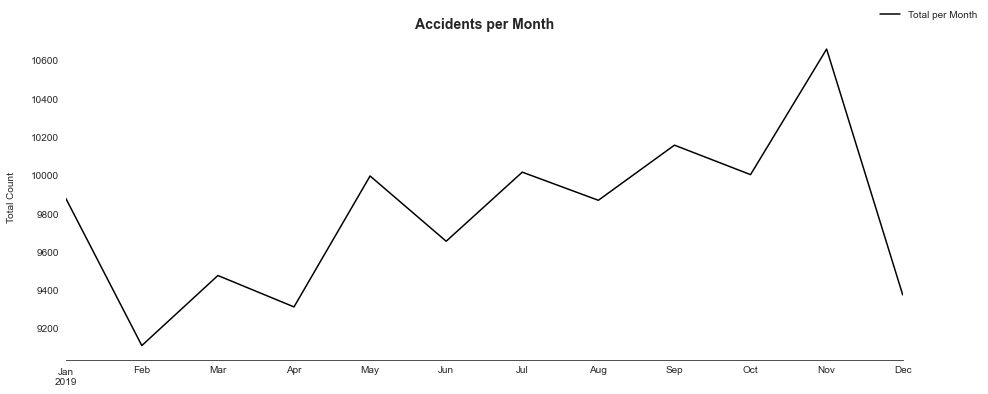

In [24]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='black', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

***On which weekdays are accidents most likely to be caused?***

- Preparing dataframe that calculates average accidents per weekday:

In [25]:
weekday_counts = pd.DataFrame(accidents.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
#weekday_counts

weekday = weekday_counts['Date'].dt.day_name()
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)
weekday_averages

,Average_Accidents
Weekday,
Friday,348.750000
Monday,315.288462
Saturday,311.365385
Sunday,280.403846
Thursday,340.692308
Tuesday,331.377358
Wednesday,325.519231


- Plotting this dataframe:

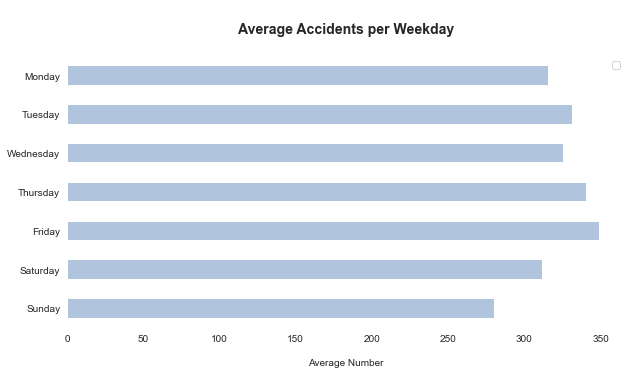

In [26]:
# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

***How are accidents related to weather conditions?***

In [27]:
accidents.Weather_Conditions.value_counts(normalize=True)

1    0.785427
2    0.130127
9    0.029232
8    0.025896
5    0.012161
4    0.010467
7    0.003353
3    0.002996
6    0.000340
Name: Weather_Conditions, dtype: float64

<AxesSubplot:>

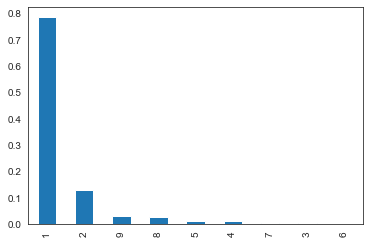

In [28]:
accidents.Weather_Conditions.value_counts(normalize=True).plot(kind='bar')

*As most of the days the `Weather_Condition` is "fine" (=1), most accidents will likely to be happen then.*

***What percentage of each category of accident severity do we have?***

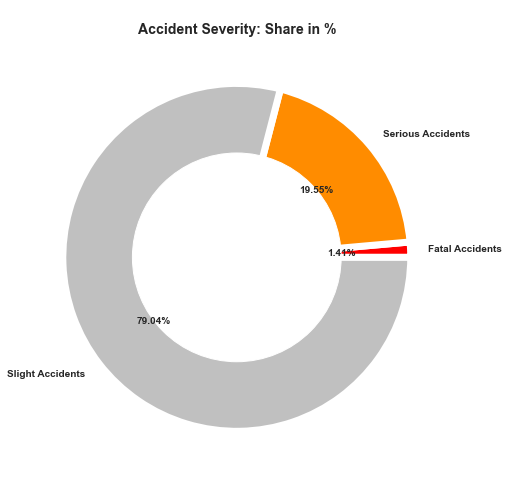

In [29]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()[1]
serious = accidents.Accident_Severity.value_counts()[2]
slight  = accidents.Accident_Severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the piechart look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in %', fontsize=14, fontweight='bold')
plt.show()

***How has the number of fatalities developed over the year?***

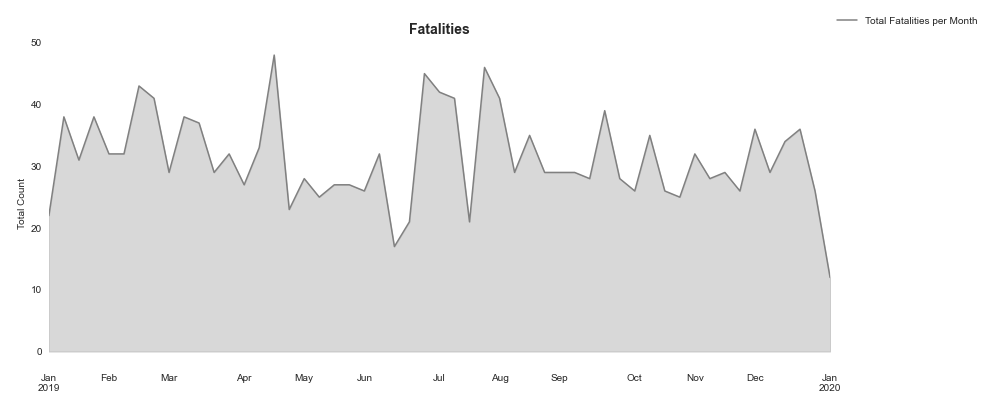

In [30]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']==1
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='grey', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='grey', alpha=0.3)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

***Is the share of fatal accidents increasing or decreasing?***

In [31]:
sub_df = accidents[['Date', 'Accident_Index', 'Accident_Severity']]

# pull out the year
year = sub_df['Date'].dt.year
week = sub_df['Date'].dt.week

# groupby year and severities
count_of_fatalities = sub_df.set_index('Date').groupby([pd.Grouper(freq='W'), 'Accident_Severity']).size()

# build a nice table
fatalities_table = count_of_fatalities.rename_axis(['Week', 'Accident_Severity'])\
                                      .unstack('Accident_Severity')\
                                      .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
fatalities_table.head()

Accident_Severity,fatal,serious,slight
Week,,,
2019-01-06,22,351,1421
2019-01-13,38,416,1710
2019-01-20,31,391,1779
2019-01-27,38,392,1859
2019-02-03,32,387,1785


In [32]:
fatalities_table['sum'] = fatalities_table.sum(axis=1)
fatalities_table = fatalities_table.join(fatalities_table.div(fatalities_table['sum'], axis=0), rsuffix='_percentage')
fatalities_table.head()

Accident_Severity,fatal,serious,slight,sum,fatal_percentage,serious_percentage,slight_percentage,sum_percentage
Week,,,,,,,,
2019-01-06,22,351,1421,1794,0.012263,0.195652,0.792085,1.0
2019-01-13,38,416,1710,2164,0.017560,0.192237,0.790203,1.0
2019-01-20,31,391,1779,2201,0.014085,0.177647,0.808269,1.0
2019-01-27,38,392,1859,2289,0.016601,0.171254,0.812145,1.0
2019-02-03,32,387,1785,2204,0.014519,0.175590,0.809891,1.0


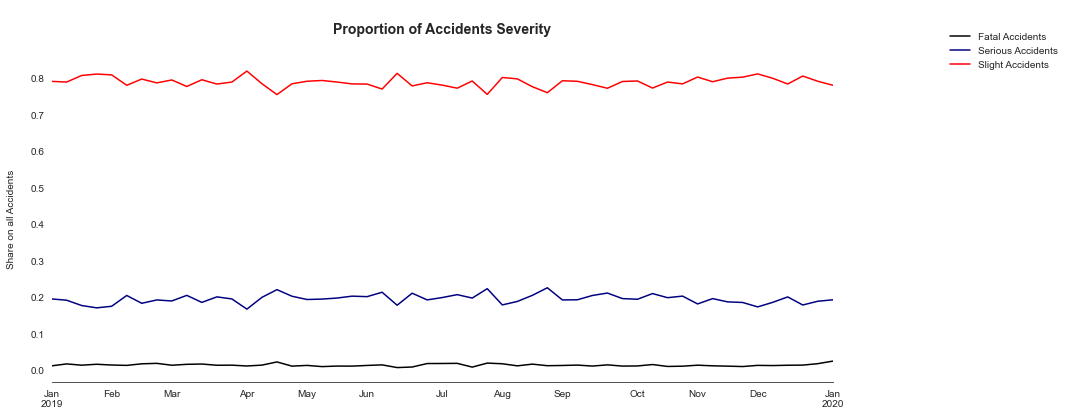

In [33]:
# prepare data
sub_df = fatalities_table[['fatal_percentage', 'serious_percentage', 'slight_percentage']]

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))
colors=['black', 'navy', 'red']

# plot
sub_df.plot(color=colors, ax=ax)
ax.set_title('\nProportion of Accidents Severity\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Share on all Accidents\n', xlabel='')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=False);

*The trend for fatal accidents seems to stagnate.*

***How are accidents distributed throughout the day?***

- Distribution of Hours

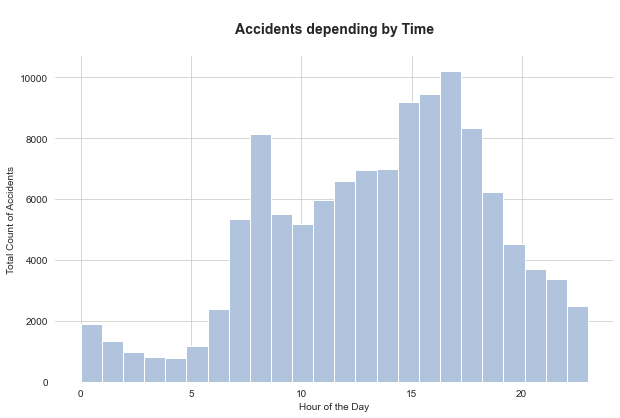

In [34]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
accidents.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents depending by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

- Counts of Accidents by Daytime

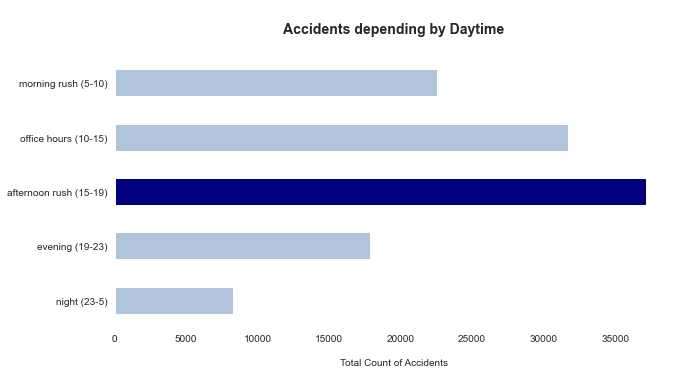

In [35]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = accidents.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents depending by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Count of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

- Share of Accident Severity by Daytime

In [36]:
# prepare dataframe with simple counts
counts = accidents.groupby(['Daytime', 'Accident_Severity']).size()

counts = counts.rename_axis(['Daytime', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts

Accident_Severity,fatal,serious,slight
Daytime,,,
afternoon rush (15-19),417,7154,29596
evening (19-23),286,3811,13733
morning rush (5-10),249,4006,18292
night (23-5),250,2010,6022
office hours (10-15),456,5995,25231


In [37]:
# prepare dataframe with shares
counts['sum'] = counts.sum(axis=1)
counts = counts.join(counts.div(counts['sum'], axis=0), rsuffix=' in %')
counts_share = counts.drop(columns=['fatal', 'serious', 'slight', 'sum', 'sum in %'], axis=1)
counts_share

Accident_Severity,fatal in %,serious in %,slight in %
Daytime,,,
afternoon rush (15-19),0.011220,0.192483,0.796298
evening (19-23),0.016040,0.213741,0.770219
morning rush (5-10),0.011044,0.177673,0.811283
night (23-5),0.030186,0.242695,0.727119
office hours (10-15),0.014393,0.189224,0.796383


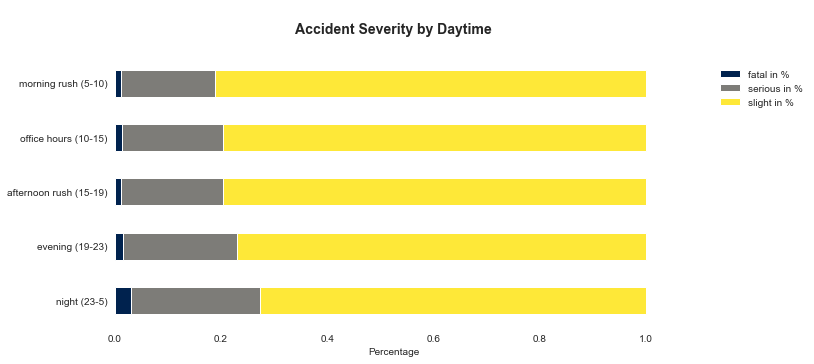

In [38]:
# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))

# plot
counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.2. Main Characteristics of Casualties 
<a id='3.2. Main Characteristics of Casualties'></a>

In [39]:
casualties.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,153158.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
vehicle_reference,153158.0,1.464840,0.608019,1.0,1.0,1.0,2.0,20.0
casualty_reference,153158.0,1.393933,2.820059,1.0,1.0,1.0,1.0,991.0
casualty_class,153158.0,1.493856,0.730922,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,153158.0,1.390342,0.519260,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,153158.0,36.932612,19.686892,-1.0,22.0,34.0,50.0,102.0
age_band_of_casualty,153158.0,6.322347,2.468329,-1.0,5.0,6.0,8.0,11.0
casualty_severity,153158.0,2.811456,0.419374,1.0,3.0,3.0,3.0,3.0
pedestrian_location,153158.0,0.760711,2.121485,-1.0,0.0,0.0,0.0,10.0
pedestrian_movement,153158.0,0.599929,1.919874,0.0,0.0,0.0,0.0,9.0


***What is the most frequent age of casualties?***

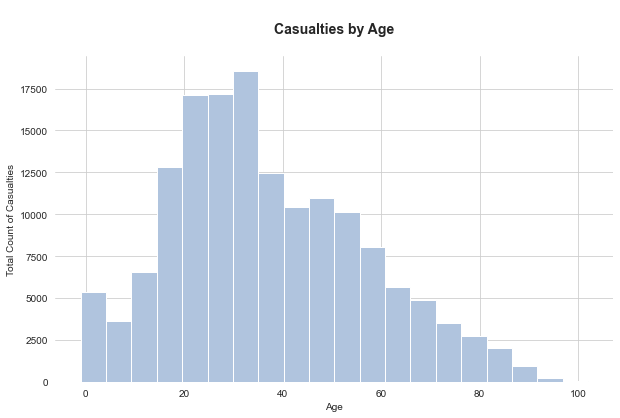

In [40]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
casualties.age_of_casualty.hist(bins=20, ax=ax, color='lightsteelblue')
ax.set_title('\nCasualties by Age\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Age', ylabel='Total Count of Casualties')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

*It looks like it's the young people that are the most affected!*

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.3. Main Characteristics of Vehicles 
<a id='3.3. Main Characteristics of Vehicles'></a>

In [41]:
#vehicles.describe().T

***What are the age and gender of the drivers who cause an accident?***

In [42]:
vehicles.sex_of_driver.value_counts(normalize=True)

 1    0.622014
 2    0.269820
 3    0.108161
-1    0.000005
Name: sex_of_driver, dtype: float64

*We'll have to keep in mind that two-thirds of the drivers are male --> imbalanced classes!*

In [43]:
# create a new dataframe
drivers = vehicles.groupby(['age_band_of_driver', 'sex_of_driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['age_band_of_driver'] == -1) | \
                     (drivers['sex_of_driver'] == -1) | \
                     (drivers['sex_of_driver'] == 3)]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['age_band_of_driver', 'sex_of_driver', 'Count']

# rename the values to be more convenient for the reader resp. viewer
drivers['sex_of_driver'] = drivers['sex_of_driver'].map({1: 'male', 2: 'female'})
drivers['age_band_of_driver'] = drivers['age_band_of_driver'].map({1: '0 - 5', 2: '6 - 10', 3: '11 - 15',
                                                                   4: '16 - 20', 5: '21 - 25', 6: '26 - 35',
                                                                   7: '36 - 45', 8: '46 - 55', 9: '56 - 65',
                                                                   10: '66 - 75', 11: 'Over 75'})

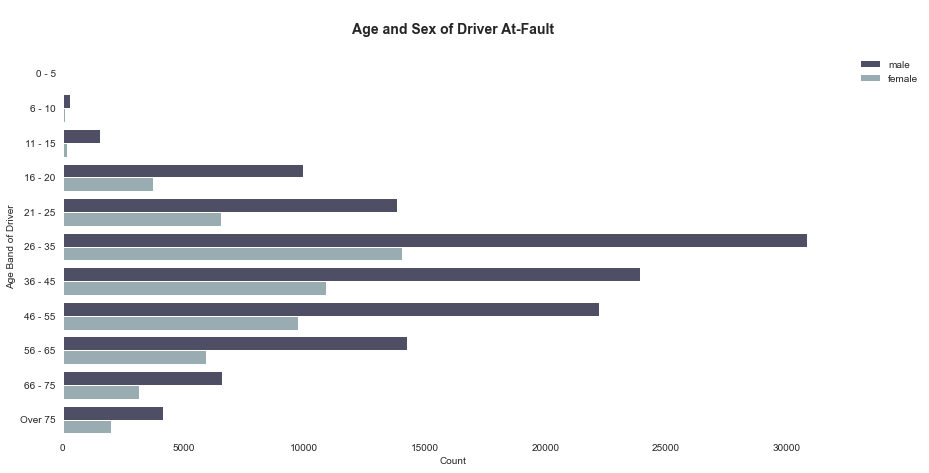

In [44]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='age_band_of_driver', x='Count', hue='sex_of_driver', data=drivers, palette='bone')
ax.set_title('\nAge and Sex of Driver At-Fault\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

***Which type of propulsion is often involved in accidents?***

In [45]:
vehicles['propulsion_code'].value_counts()

 1     86721
 2     70085
-1     54447
 8      4529
 3       370
 7       109
 12       66
 5        39
 6        13
 9         1
 4         1
Name: propulsion_code, dtype: int64

In [46]:
# prepare dataframe
df_plot = vehicles.groupby('propulsion_code').size()\
                                                .reset_index(name='counts')\
                                                    .sort_values(by='counts', ascending=False)
                                                        
df_plot = df_plot[df_plot.counts > 9000]
df_plot['propulsion_code'] = df_plot['propulsion_code'].map({-1: 'Undefined', 1: 'Petrol', 
                                                             2: 'Heavy oil'})
df_plot

,propulsion_code,counts
1,Petrol,86721
2,Heavy oil,70085
0,Undefined,54447


In [47]:
# library for plotting a tree map
import squarify

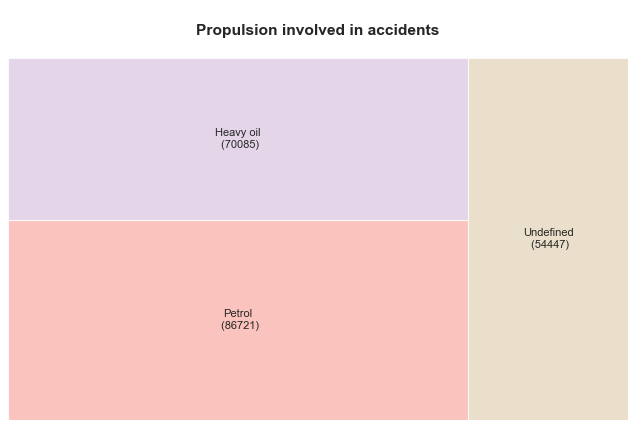

In [48]:
# prepare plot
labels = df_plot.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_plot['counts'].values.tolist()
colors = [plt.cm.Pastel1(i/float(len(labels))) for i in range(len(labels))]

# plot
plt.figure(figsize=(10,6), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('\nPropulsion involved in accidents\n', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()